<a href="https://colab.research.google.com/github/BasitHussain5/-Rainfall-Analysis-and-Prediction-in-Pakistan/blob/main/Threatening_URDU_Language_Detection_from_Tweets_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import matplotlib.pyplot as plt  
import random      


In [99]:
# Specify the path to your XLSX file
file_path = 'dataset.xlsx'

# Read the XLSX file into a DataFrame
df = pd.read_excel(file_path)


In [100]:
df.head()

,Tweets,label,S/G
0,بکواس مت کرو,1,1
1,تمہاری ہیجڑا فورس ایک نہتے کے سامنے بکری بنی ہ...,1,0
2,آفیسر سمیتبھارتی فوجی جہنم واصل،بنکرز تباہ بھا...,1,1
3,غدار منافق میر اللہ تمہیں زلیل کرے,1,1
4,اگست پر آپ بھارت کو کیا پیغام دینا چاہیں گے؟ م...,1,0


In [101]:
df["Tweets"][4]

'اگست پر آپ بھارت کو کیا پیغام دینا چاہیں گے؟ میرا یہ پیغام ھے کہ کشمیر سے نکل جاو ورنہ کتے کی موت مارے جاو گے کشمیر ہمارا ھے'

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1747 (\N{ARABIC LETTER YEH BARREE WITH HAMZA ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/d

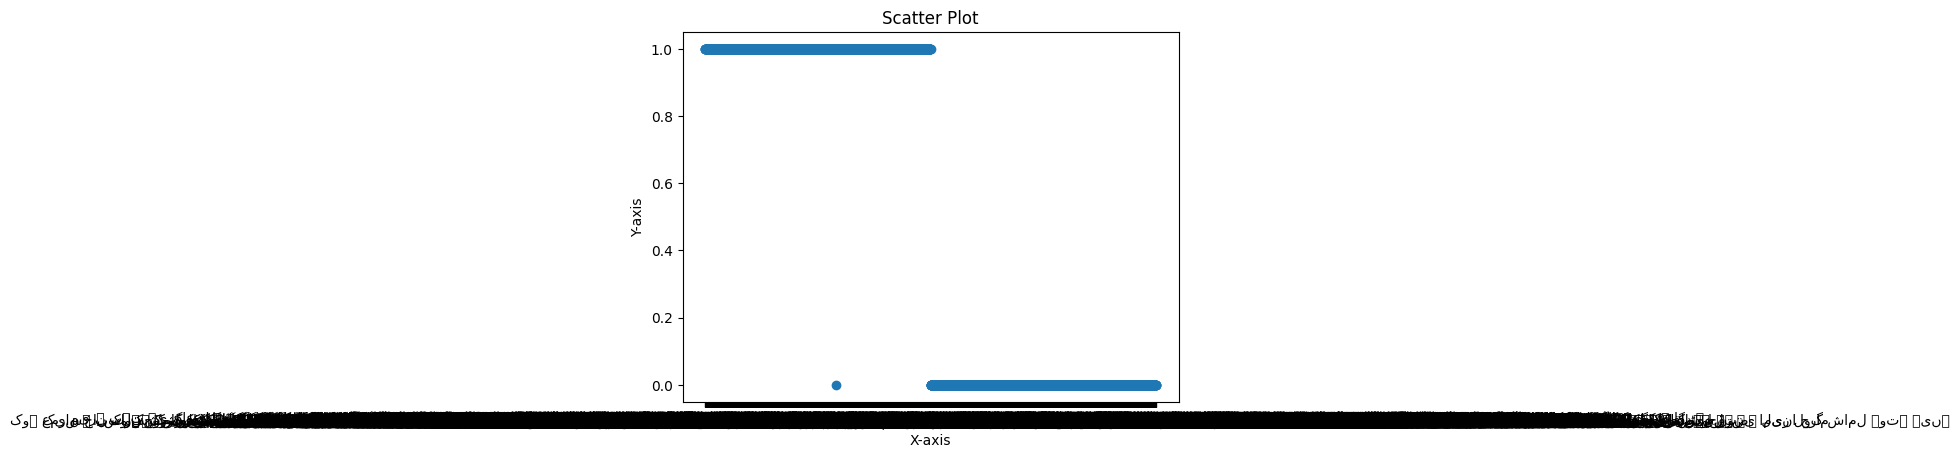

In [102]:
import matplotlib.pyplot as plt

# Generate some random data
x = df["Tweets"]
y = df["label"]

# Create a scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Display the plot
plt.show()


In [103]:
all_positive_tweets = df["label"] == 1
all_negative_tweets =  df["label"] == 0

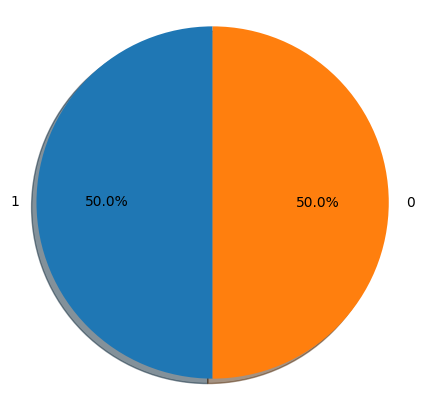

In [104]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 1, 0

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [105]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  3564
Number of negative tweets:  3564

The type of all_positive_tweets is:  <class 'pandas.core.series.Series'>
The type of a tweet entry is:  <class 'numpy.bool_'>


**Preprocess raw text for Sentiment analysis**

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

Tokenizing the string

Lowercasing

Removing stop words and punctuation

Stemming

**Remove punctuations**

In [106]:
import string

# Assuming you have a DataFrame named 'df' with a text column 'x'

# Define a string of all punctuation characters specific to Urdu
urdu_punctuations = "؛؟،٫٬«»‘’“”(){}[]:;،.?!~@#$%^&*+-*/_=<>"

# Remove punctuations from the 'x' column in the DataFrame
df['Tweets'] = df['Tweets'].apply(lambda text: text.translate(str.maketrans('', '', urdu_punctuations)))


In [107]:
df["Tweets"][4]

'اگست پر آپ بھارت کو کیا پیغام دینا چاہیں گے میرا یہ پیغام ھے کہ کشمیر سے نکل جاو ورنہ کتے کی موت مارے جاو گے کشمیر ہمارا ھے'

**Tokenize the string**

In [108]:
import nltk
from nltk.tokenize import RegexpTokenizer

# Define a custom Urdu tokenizer (replace with your own implementation)
urdu_tokenizer = RegexpTokenizer(r'\w+')

# Tokenize the 'x' column in the DataFrame
df['Tweets'] = df['Tweets'].apply(lambda text: urdu_tokenizer.tokenize(text))

In [109]:
df.head()

,Tweets,label,S/G
0,"[بکواس, مت, کرو]",1,1
1,"[تمہاری, ہیجڑا, فورس, ایک, نہتے, کے, سامنے, بک...",1,0
2,"[آفیسر, سمیتبھارتی, فوجی, جہنم, واصلبنکرز, تبا...",1,1
3,"[غدار, منافق, میر, اللہ, تمہیں, زلیل, کرے]",1,1
4,"[اگست, پر, آپ, بھارت, کو, کیا, پیغام, دینا, چا...",1,0


**Remove stop words**

In [110]:
# Open the text file in read mode
with open("stopwords-ur.json.txt", 'r') as file:
    content = file.read()

print(content)

["آئی","آئے","آج","آخر","آخرکبر","آدهی","آًب","آٹھ","آیب","اة","اخبزت","اختتبم","ادھر","ارد","اردگرد","ارکبى","اش","اضتعوبل","اضتعوبلات","اضطرذ","اضکب","اضکی","اضکے","اطراف","اغیب","افراد","الگ","اور","اوًچب","اوًچبئی","اوًچی","اوًچے","اى","اً","اًذر","اًہیں","اٹھبًب","اپٌب","اپٌے","اچھب","اچھی","اچھے","اکثر","اکٹھب","اکٹھی","اکٹھے","اکیلا","اکیلی","اکیلے","اگرچہ","اہن","ایطے","ایک","ب","ت","تبزٍ","تت","تر","ترتیت","تریي","تعذاد","تن","تو","توبم","توہی","توہیں","تٌہب","تک","تھب","تھوڑا","تھوڑی","تھوڑے","تھی","تھے","تیي","ثب","ثبئیں","ثبترتیت","ثبری","ثبرے","ثبعث","ثبلا","ثبلترتیت","ثبہر","ثدبئے","ثرآں","ثراں","ثرش","ثعذ","ثغیر","ثلٌذ","ثلٌذوثبلا","ثلکہ","ثي","ثٌب","ثٌبرہب","ثٌبرہی","ثٌبرہے","ثٌبًب","ثٌذ","ثٌذکرو","ثٌذکرًب","ثٌذی","ثڑا","ثڑوں","ثڑی","ثڑے","ثھر","ثھرا","ثھراہوا","ثھرپور","ثھی","ثہت","ثہتر","ثہتری","ثہتریي","ثیچ","ج","خب","خبرہب","خبرہی","خبرہے","خبهوظ","خبًب","خبًتب","خبًتی","خبًتے","خبًٌب","خت","ختن","خجکہ","خص","خططرذ","خلذی","خو","خواى","خوًہی","خوکہ","خٌبة","خگہ","خگ

In [111]:
import pandas as pd
# Define a custom list of Urdu stop words
urdu_stop_words = content

# Remove stop words from the 'x' column in the DataFrame
df['Tweets'] = df['Tweets'].apply(lambda text: [word for word in text if word not in urdu_stop_words])

In [112]:
df.head()

,Tweets,label,S/G
0,"[بکواس, مت]",1,1
1,"[تمہاری, ہیجڑا, فورس, نہتے, سامنے, بکری, بنی, ...",1,0
2,"[آفیسر, سمیتبھارتی, فوجی, جہنم, واصلبنکرز, تبا...",1,1
3,"[غدار, منافق, میر, اللہ, تمہیں, زلیل]",1,1
4,"[اگست, آپ, بھارت, کیا, پیغام, دینا, چاہیں, میر...",1,0


**Stemming** 

In [113]:
!pip install nltk



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
from hazm import Stemmer

# Initialize the Urdu stemmer
urdu_stemmer = Stemmer()


In [116]:
# Apply stemming to the 'Tweets' column in the DataFrame
df['Tweets'] = df['Tweets'].apply(lambda text: [urdu_stemmer.stem(word) for word in text])


In [117]:
df.head()

,Tweets,label,S/G
0,"[بکواس, م]",1,1
1,"[تمہار, ہیجڑا, فورس, نہتے, سامنے, بکر, بن, ڈوب...",1,0
2,"[آفیسر, سمیتبھارت, فوج, جہن, واصلبنکرز, تباہ, ...",1,1
3,"[غدار, منافق, میر, اللہ, تمہیں, زلیل]",1,1
4,"[اگس, آپ, بھار, کیا, پیغا, دینا, چاہیں, میرا, ...",1,0


**Model**

In [118]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [119]:
x = np.array(df["Tweets"])
y = np.array(df["label"])

In [120]:
cv = CountVectorizer()
X = cv.fit_transform(df['Tweets'].apply(lambda x: ' '.join(x)))
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create an instance of Logistic Regression
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7012622720897616


In [122]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Create an instance of Multinomial Naive Bayes
naive_bayes = MultinomialNB()

# Fit the model on the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7321178120617111


In [123]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of SVM
svm = SVC()

# Fit the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7110799438990182
